In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df.production_budget=df.production_budget.apply(lambda x: x.strip('$'))
df.production_budget=df.production_budget.replace({",":''}, regex=True).apply(pd.to_numeric)
df.domestic_gross=df.domestic_gross.apply(lambda x: x.strip('$'))
df.domestic_gross=df.domestic_gross.replace({",":''}, regex=True).apply(pd.to_numeric)
df.worldwide_gross=df.worldwide_gross.apply(lambda x: x.strip('$'))
df.worldwide_gross=df.worldwide_gross.replace({",":''}, regex=True).apply(pd.to_numeric)
df['domestic_profit']=df.domestic_gross-df.production_budget
df['worldwide_profit']=df.worldwide_gross-df.production_budget
df.release_date=pd.to_datetime(df.release_date)
df['release_year'] = df['release_date'].dt.to_period('Y')


In [141]:
bydates=df.sort_values(by = 'release_date')
low_cutoff=pd.to_datetime('2000')
high_cutoff=pd.to_datetime('2018')
bydate_temp=bydates.loc[(bydates.release_date >=low_cutoff)&(bydates.release_date<=high_cutoff)]
bydate=bydate_temp
# .loc[bydates.domestic_gross!=0]

In [137]:
df2=bydate.groupby('release_year')

In [124]:
bydate['profit_margin']=bydate.worldwide_profit/bydate.production_budget

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
df2=

SyntaxError: invalid syntax (<ipython-input-125-0e8aad86f010>, line 1)

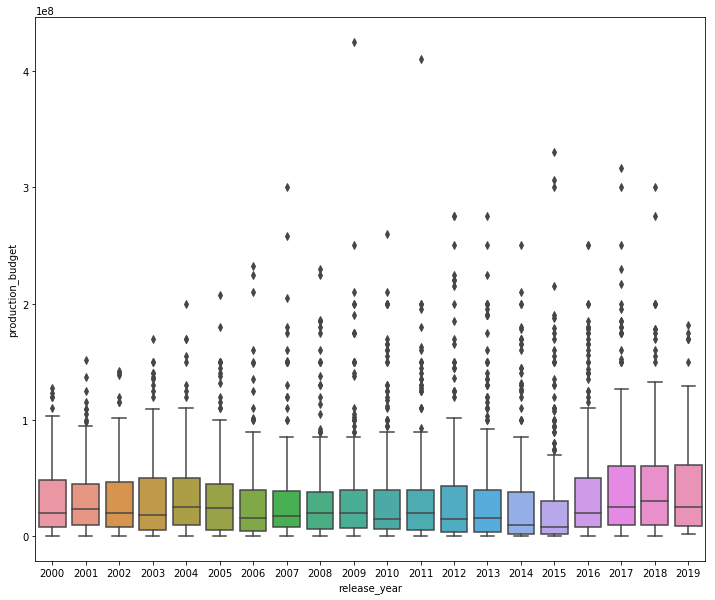

In [126]:
plt.figure(figsize=(12,10))
plot1 = sns.boxplot(x="release_year", y="production_budget", data=bydate)

In [127]:
by_pm_temp=bydate.sort_values(by='profit_margin')

In [128]:
by_pm_temp.tail(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_year,profit_margin
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,100759490,2012,100.759490
5680,81,2006-09-29,Facing the Giants,100000,10178331,10243159,10078331,10143159,2006,101.431590
5430,31,2004-08-06,Open Water,500000,30500882,55518641,30000882,55018641,2004,110.037282
5507,8,2004-06-11,Napoleon Dynamite,400000,44540956,46122713,44140956,45722713,2004,114.306782
5774,75,2004-10-08,Primer,7000,424760,841926,417760,834926,2004,119.275143
5656,57,2007-05-16,Once,150000,9445857,23323631,9295857,23173631,2007,154.490873
5781,82,2005-08-05,My Date With Drew,1100,181041,181041,179941,179941,2005,163.582727
5709,10,2004-05-07,Super Size Me,65000,11529368,22233808,11464368,22168808,2004,341.058585
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,41556474,2015,415.564740
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,107468810,193733034,2009,430.517853


In [129]:
by_pm=by_pm_temp.drop([5679,5492,5211,5459])
by_pm.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_year,profit_margin
5765,66,2001-03-09,Dayereh,10000,673780,673780,663780,663780,2001,66.378000
4247,48,2002-04-19,My Big Fat Greek Wedding,5000000,241438208,374890034,236438208,369890034,2002,73.978007
5156,57,2004-10-29,Saw,1200000,55968727,103880027,54768727,102680027,2004,85.566689
5680,81,2006-09-29,Facing the Giants,100000,10178331,10243159,10078331,10143159,2006,101.431590
5430,31,2004-08-06,Open Water,500000,30500882,55518641,30000882,55018641,2004,110.037282
5507,8,2004-06-11,Napoleon Dynamite,400000,44540956,46122713,44140956,45722713,2004,114.306782
5774,75,2004-10-08,Primer,7000,424760,841926,417760,834926,2004,119.275143
5656,57,2007-05-16,Once,150000,9445857,23323631,9295857,23173631,2007,154.490873
5781,82,2005-08-05,My Date With Drew,1100,181041,181041,179941,179941,2005,163.582727
5709,10,2004-05-07,Super Size Me,65000,11529368,22233808,11464368,22168808,2004,341.058585


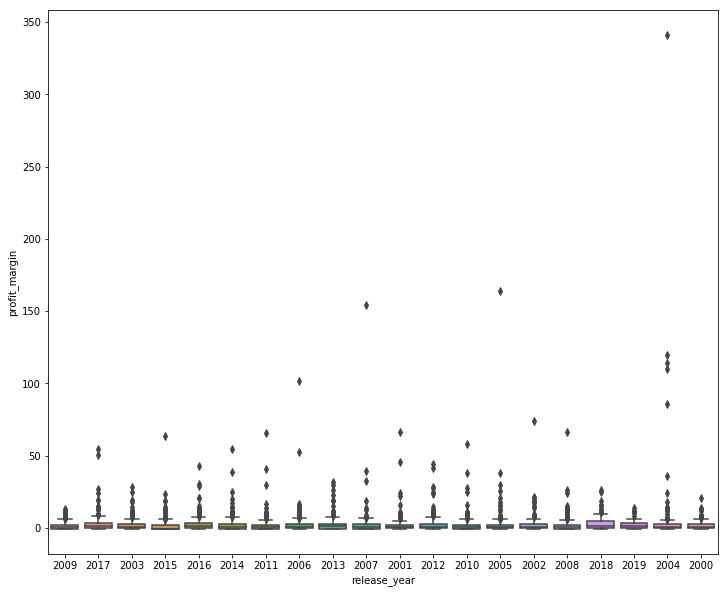

In [130]:
plt.figure(figsize=(12,10))
plot2 = sns.boxplot(x="release_year", y="profit_margin", data=by_pm)

In [131]:
pd.concat([by_pm[['release_year','domestic_profit','region']],by_pm[['release_year','foreign_profit','region']]

SyntaxError: unexpected EOF while parsing (<ipython-input-131-93cfedf13cf7>, line 1)

In [132]:
by_pm['prop_int']=by_pm.domestic_gross/by_pm.worldwide_gross

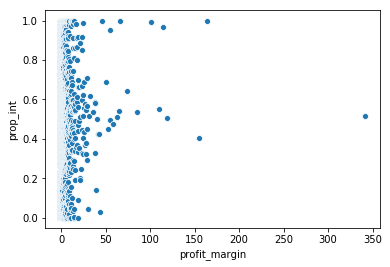

In [133]:
plot3=sns.scatterplot(x='profit_margin', y='prop_int', data=by_pm)
#doesn't look like correlation

In [134]:
by_pm.production_budget.min()

1100

In [140]:
bydate.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
count,4174.000000,4.174000e+03,4.174000e+03,4.174000e+03,4.174000e+03,4.174000e+03
mean,49.953043,3.370586e+07,4.075075e+07,9.402738e+07,7.044893e+06,6.032152e+07
std,28.532444,4.466330e+07,6.911965e+07,1.800046e+08,4.702671e+07,1.475040e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.019413e+08,-1.104502e+08
25%,25.000000,5.000000e+06,5.188242e+05,2.507722e+06,-1.000000e+07,-2.282110e+06
50%,50.000000,1.800000e+07,1.464640e+07,2.849772e+07,-1.000000e+06,7.279374e+06
75%,74.000000,4.100000e+07,5.095441e+07,9.913259e+07,1.268103e+07,6.145225e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,6.306622e+08,2.351345e+09
